# Regression Analysis of Mortality Caused by Heat  
#### In this notebook, I try to investigate the relation between heat and the mortality caused by heat by using regression analysis.  I do linear regression and rigid regression orderly. Due to the small sample size. Leave-One-Out cross validation is applied in parameter tuning and prediction is made using rigid regression.

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
heat_death_eu = pd.read_csv('heat_death_eu.csv')
heat_death_eu.columns

Index(['nation', 'year', 'month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'pop_density', 'gdp_last_year', 'max_tem', 'min_tem',
       'elevat', 'precip', 'wind', 'humi', 'solar', 'high_t', 'Bulgaria',
       'Croatia', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
       'Netherlands', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain'],
      dtype='object')

In [3]:
heat_death_eu.shape

(41, 36)

In [4]:
heat_death_eu[['Total Deaths', 'max_tem', 'min_tem', 'elevat', 'precip', 'wind', 'humi', 'solar', 'pop_density', 'gdp_last_year', 'high_t']].corr()

,Total Deaths,max_tem,min_tem,elevat,precip,wind,humi,solar,pop_density,gdp_last_year,high_t
Total Deaths,1.000000,0.228142,0.100682,0.092974,-0.089961,-0.141484,-0.138082,-0.163452,0.067187,0.447178,0.256875
max_tem,0.228142,1.000000,0.587646,0.147781,-0.757225,-0.145182,-0.882970,0.675832,-0.236996,0.142378,0.926003
min_tem,0.100682,0.587646,1.000000,-0.012417,-0.536002,0.380707,-0.376487,0.550544,-0.263908,-0.019025,0.609583
elevat,0.092974,0.147781,-0.012417,1.000000,-0.017865,-0.258794,-0.197382,0.247731,-0.677630,0.075853,0.243355
precip,-0.089961,-0.757225,-0.536002,-0.017865,1.000000,-0.212162,0.807613,-0.641335,0.141205,0.058953,-0.763940
wind,-0.141484,-0.145182,0.380707,-0.258794,-0.212162,1.000000,0.118434,0.084777,-0.118745,-0.306621,-0.068101
humi,-0.138082,-0.882970,-0.376487,-0.197382,0.807613,0.118434,1.000000,-0.607188,0.316888,0.023412,-0.794571
solar,-0.163452,0.675832,0.550544,0.247731,-0.641335,0.084777,-0.607188,1.000000,-0.363747,-0.141617,0.637085
pop_density,0.067187,-0.236996,-0.263908,-0.677630,0.141205,-0.118745,0.316888,-0.363747,1.000000,0.300984,-0.328024
gdp_last_year,0.447178,0.142378,-0.019025,0.075853,0.058953,-0.306621,0.023412,-0.141617,0.300984,1.000000,0.159998


## Linear Regression

In [8]:
X = heat_death_eu[['max_tem', 'min_tem', 'elevat', 'precip', 'wind', 'humi', 'solar', 'pop_density', 'gdp_last_year', 'high_t',
                  'Bulgaria', 'Croatia', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 
                   'Netherlands', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain']]
y = heat_death_eu['Total Deaths']
X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float)).fit()

model.summary() ## Linear regression with nation dummy

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total Deaths   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                 -0.219
Method:                 Least Squares   F-statistic:                    0.6873
Date:                Sun, 03 Sep 2023   Prob (F-statistic):              0.801
Time:                        12:21:12   Log-Likelihood:                -392.80
No. Observations:                  41   AIC:                             833.6
Df Residuals:                      17   BIC:                             874.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.896e+05   2.62e+05      0.723      0.479   -3.63e+05    7.43e+05
max_tem        3305.1790   4690.335      0.705      0.491   -6590.562    1.32e+04
min_tem       -1223.2335   3536.621     -0.346      0.734   -8684.853    6238.385
elevat         -134.1276    123.081     -1.090      0.291    -393.806     125.551
precip        -4479.1957   3759.005     -1.192      0.250   -1.24e+04    3451.611
wind           1866.4525   7335.812      0.254      0.802   -1.36e+04    1.73e+04
humi           4.197e+04   8.92e+04      0.470      0.644   -1.46e+05     2.3e+05
solar          -836.2016    754.030     -1.109      0.283   -2427.065     754.662
pop_density    -681.3775    622.096     -1.095      0.289   -1993.886     631.131
gdp_last_year    30.5629     21.451      1.425      0.172     -14.695      75.821
high_t         -746.4277    705.460     -1.058      0.305   -2234.819     741.964
Bulgaria      -1.699e+05   1.61e+05     -1.055      0.306   -5.09e+05     1.7e+05
Croatia       -1.668e+05   1.59e+05     -1.052      0.308   -5.01e+05    1.68e+05
France        -1.904e+05   1.63e+05     -1.170      0.258   -5.34e+05    1.53e+05
Germany       -1.548e+05   1.19e+05     -1.299      0.211   -4.06e+05    9.66e+04
Greece        -1.535e+05   1.44e+05     -1.068      0.301   -4.57e+05     1.5e+05
Hungary       -1.736e+05   1.58e+05     -1.101      0.286   -5.06e+05    1.59e+05
Ireland       -1.836e+05   1.72e+05     -1.069      0.300   -5.46e+05    1.79e+05
Italy         -1.025e+05   8.69e+04     -1.179      0.255   -2.86e+05    8.09e+04
Netherlands   -8.441e+04   7.15e+04     -1.181      0.254   -2.35e+05    6.64e+04
Portugal      -1.763e+05    1.6e+05     -1.105      0.285   -5.13e+05     1.6e+05
Romania       -1.492e+05   1.41e+05     -1.056      0.306   -4.47e+05    1.49e+05
Slovakia      -7.008e+04   7.01e+04     -1.000      0.331   -2.18e+05    7.77e+04
Slovenia      -8.055e+04   7.89e+04     -1.021      0.322   -2.47e+05     8.6e+04
Spain         -1.356e+05   1.21e+05     -1.119      0.279   -3.91e+05     1.2e+05
==============================================================================
Omnibus:                       13.101   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.965
Skew:                           1.050   Prob(JB):                     0.000563
Kurtosis:                       5.085   Cond. No.                     2.29e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.76e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
X = heat_death_eu[['max_tem', 'min_tem', 'precip', 'elevat', 'wind', 'humi', 'solar', 'pop_density', 'gdp_last_year', 'high_t']]
y = heat_death_eu['Total Deaths']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model.summary() ## Linear regression without nation dummy

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total Deaths   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     1.669
Date:                Sun, 03 Sep 2023   Prob (F-statistic):              0.135
Time:                        17:54:39   Log-Likelihood:                -397.21
No. Observations:                  41   AIC:                             816.4
Df Residuals:                      30   BIC:                             835.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4042.4825   3.07e+04     -0.132      0.896   -6.67e+04    5.86e+04
max_tem         589.0271    978.302      0.602      0.552   -1408.932    2586.986
min_tem         143.6539    479.345      0.300      0.766    -835.299    1122.607
precip         -265.8813   1660.222     -0.160      0.874   -3656.506    3124.744
elevat            2.7732      3.624      0.765      0.450      -4.627      10.174
wind            663.2333   2327.180      0.285      0.778   -4089.502    5415.968
humi           3669.9444    2.4e+04      0.153      0.880   -4.54e+04    5.28e+04
solar          -826.3443    359.584     -2.298      0.029   -1560.712     -91.976
pop_density       3.0688     14.356      0.214      0.832     -26.249      32.387
gdp_last_year     1.6233      1.116      1.455      0.156      -0.656       3.902
high_t           60.8869    302.683      0.201      0.842    -557.274     679.048
==============================================================================
Omnibus:                       26.209   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.588
Skew:                           1.753   Prob(JB):                     2.81e-11
Kurtosis:                       7.019   Cond. No.                     5.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
degrees = [1, 2]
for degree in degrees:
    lf = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                   ('linear', linear_model.LinearRegression())])
    lf.fit(X, y)
    pred_death = lf.predict(X)
    MSE = mse(pred_death, y)
    score = lf.score(X, y)
    print('degree: {}, mse: {}, score: {}'.format(degree, MSE, score))

degree: 1, mse: 15221155.835622773, score: 0.35744944424840885
degree: 2, mse: 1.3062497483204938e-15, score: 1.0


## Rigid Regression

In [25]:
for degree in degrees:
    clf = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                   ('rigid', RidgeCV(alphas=[0.001, 0.005, 0.01, 0.05, 0.1]))])
    clf.fit(X, y)
    pred_death = clf.predict(X)
    MSE = mse(pred_death, y)
    score = clf.score(X, y)
    print('degree: {}, mse: {}, score: {}'.format(degree, MSE, score))

degree: 1, mse: 15227640.251716908, score: 0.3571757091122598
degree: 2, mse: 205.37767983594003, score: 0.999991330123432


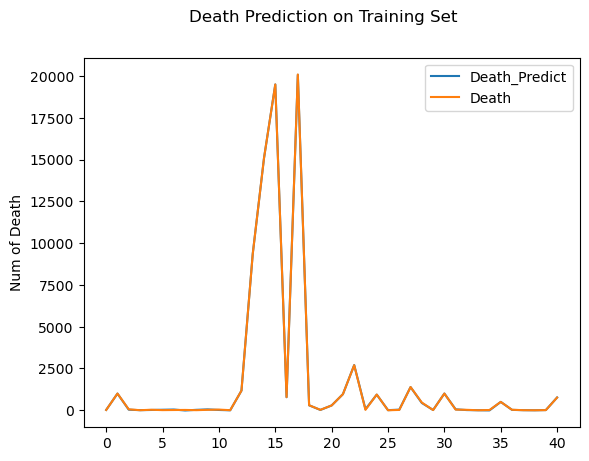

In [28]:
plt.plot(pred_death, label='Death_Predict')
plt.plot(y, label='Death')
plt.ylabel('Num of Death')
plt.suptitle('Death Prediction on Training Set')
plt.legend()
plt.show()